<a href="https://colab.research.google.com/github/EnricoHuber/SoloLearn/blob/main/Machine_Learning_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning with Solo Learn
In this notebook we are going to cover some algorithms for classification in Python using some famous libraries.

## Statistics Review with Python

Some known statistics can be computed with Numpy. See Numpy [documentation](https://numpy.org/doc/) here.

In [ ]:
import numpy as np

data = [15, 16, 18, 19, 22, 24, 29, 30, 34]

print("mean:", np.mean(data))
print("median:", np.median(data))
print("50th percentile (median):", np.percentile(data, 50))
print("25th percentile:", np.percentile(data, 25))
print("75th percentile:", np.percentile(data, 75))
print("standard deviation:", np.std(data))
print("variance:", np.var(data))

mean: 23.0
median: 22.0
50th percentile (median): 22.0
25th percentile: 18.0
75th percentile: 29.0
standard deviation: 6.342099196813483
variance: 40.22222222222222


Data manipulation is down via Pandas. See Pandas [documentation](https://pandas.pydata.org/pandas-docs/stable/) here.

In [ ]:
import pandas as pd
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
print(df.head())
print(df.describe())

   Survived  Pclass     Sex   Age  Siblings/Spouses  Parents/Children     Fare
0         0       3    male  22.0                 1                 0   7.2500
1         1       1  female  38.0                 1                 0  71.2833
2         1       3  female  26.0                 0                 0   7.9250
3         1       1  female  35.0                 1                 0  53.1000
4         0       3    male  35.0                 0                 0   8.0500
         Survived      Pclass  ...  Parents/Children       Fare
count  887.000000  887.000000  ...        887.000000  887.00000
mean     0.385569    2.305524  ...          0.383315   32.30542
std      0.487004    0.836662  ...          0.807466   49.78204
min      0.000000    1.000000  ...          0.000000    0.00000
25%      0.000000    2.000000  ...          0.000000    7.92500
50%      0.000000    3.000000  ...          0.000000   14.45420
75%      1.000000    3.000000  ...          0.000000   31.13750
max      1.000

In [ ]:
col = df['Fare']
print(col)

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
882    13.0000
883    30.0000
884    23.4500
885    30.0000
886     7.7500
Name: Fare, Length: 887, dtype: float64


In [ ]:
# You can create a small subdataframe
small_df = df[['Age', 'Sex', 'Survived']]
print(small_df.head())

# We create a new column with boolean values as regarding to sex
df['male'] = df['Sex'] == 'male'
print(df.head())

    Age     Sex  Survived
0  22.0    male         0
1  38.0  female         1
2  26.0  female         1
3  35.0  female         1
4  35.0    male         0
   Survived  Pclass     Sex  ...  Parents/Children     Fare   male
0         0       3    male  ...                 0   7.2500   True
1         1       1  female  ...                 0  71.2833  False
2         1       3  female  ...                 0   7.9250  False
3         1       1  female  ...                 0  53.1000  False
4         0       3    male  ...                 0   8.0500   True

[5 rows x 8 columns]


In [ ]:
# One can convert Pandas Dataframe into a Pandas Series and then into a Numpy Array
print(df['Fare'].values)
print(df[['Pclass', 'Fare', 'Age']].values)
arr = df[['Pclass', 'Fare', 'Age']].values
print(arr.shape)

[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55     8.05    31.275    7.8542  16.
  29.125   13.      18.       7.225   26.      13.       8.0292  35.5
  21.075   31.3875   7.225  263.       7.8792   7.8958  27.7208 146.5208
   7.75    10.5     82.1708  52.       7.2292   8.05    18.      11.2417
   9.475   21.      41.5792   7.8792   8.05    15.5      7.75    21.6792
  17.8     39.6875   7.8     76.7292  26.      61.9792  35.5     10.5
   7.2292  27.75    46.9      7.2292  80.      83.475   27.9     27.7208
  15.2458  10.5      8.1583   7.925    8.6625  10.5     46.9     73.5
  14.4542  56.4958   7.65     7.8958   8.05    29.      12.475    9.
   9.5      7.7875  47.1     10.5     15.85    34.375    8.05   263.
   8.05     8.05     7.8542  61.175   20.575    7.25     8.05    34.6542
  63.3583  23.      26.       7.8958   7.8958  77.2875   8.6542   7.925
   7.8958   7.65     7.775    7.8958  24.15    52.      14.4542   8.05
   

In [ ]:
# You can also select some elements
print(arr[0, 1])
print(arr[0])
print(arr[:, 2])

7.25
[ 3.    7.25 22.  ]
[22.   38.   26.   35.   35.   27.   54.    2.   27.   14.    4.   58.
 20.   39.   14.   55.    2.   23.   31.   22.   35.   34.   15.   28.
  8.   38.   26.   19.   24.   23.   40.   48.   18.   66.   28.   42.
 18.   21.   18.   14.   40.   27.    3.   19.   30.   20.   27.   16.
 18.    7.   21.   49.   29.   65.   46.   21.   28.5   5.   11.   22.
 38.   45.    4.   64.    7.   29.   19.   17.   26.   32.   16.   21.
 26.   32.   25.   23.   28.    0.83 30.   22.   29.   31.   28.   17.
 33.   16.   20.   23.   24.   29.   20.   46.   26.   59.   22.   71.
 23.   34.   34.   28.   29.   21.   33.   37.   28.   21.   29.   38.
 28.   47.   14.5  22.   20.   17.   21.   70.5  29.   24.    2.   21.
 19.   32.5  32.5  54.   12.   19.   24.    2.   45.   33.   20.   47.
 29.   25.   23.   19.   37.   16.   24.   40.   22.   24.   19.   18.
 19.   27.    9.   36.5  42.   51.   22.   55.5  40.5  27.   51.   16.
 30.   37.    5.   44.   40.   26.   17.    1.    9.

In [ ]:
# Numpy gives the possibility to create a mask
mask = arr[:, 2] < 18       # All people who have age less than 18
print(mask)
print(mask.sum())

[False False False False False False False  True False  True  True False
 False False  True False  True False False False False False  True False
  True False False False False False False False False False False False
 False False False  True False False  True False False False False  True
 False  True False False False False False False False  True  True False
 False False  True False  True False False  True False False  True False
 False False False False False  True False False False False False  True
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False  True False False False False  True False
 False False False False  True False False  True False False False False
 False False False False False  True False False False False False False
 False False  True False False False False False False False False  True
 False False  True False False False  True  True  T

Plotting data is usually done with Matplotlib. See Matplotlib [documentation](https://matplotlib.org/3.1.3/contents.html) here.

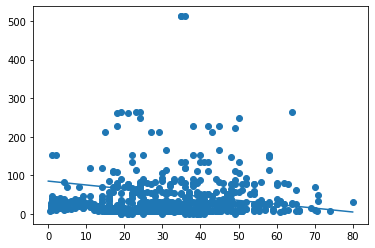

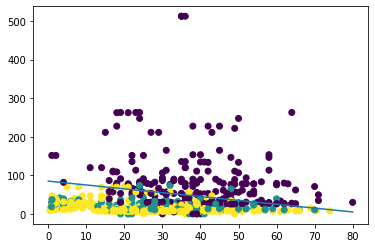

In [ ]:
% matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(df['Age'], df['Fare'])
plt.plot([0, 80], [85, 5])
plt.show()
plt.scatter(df['Age'], df['Fare'], c = df['Pclass'])
plt.plot([0, 80], [85, 5])
plt.show()


## Logistic Regression

We are going to use a classification model called **logistic regression**. Here we use:
$$\frac{1}{1+e^{-(a x+b y+c)}}$$ 
called **sigmoid** which ranges between 0 and 1.

Our aim is to maximize the so called **likelihood** defined as:

$$
\text { likelihood }=\left\{\begin{array}{ll}
p & \text { if passenger survived } \\
1-p & \text { if passenger didn't survive }
\end{array}\right.
$$

It will be the score we associate to a probability of a prediction as regarding to the real value we want to predict.

As an example
$$
\begin{array}{|l|l|l|}
\hline \text { Survived or not? } & \text { Predicted probability } & \text { Score } \\
\hline \text { Survived } & 0.25 & 0.25 \\
\hline \text { Didn't survive } & 0.25 & 0.75 \\
\hline \text { Survived } & 0.6 & 0.6 \\
\hline \text { Didn't survive } & 0.2 & 0.8 \\
\hline
\end{array}
$$

Total score will be obtained by **multiplying** the scores all together.

A machine learning model like Logistic Regression can be built via Scikit-Learn. See Scikit-Learn [documentation](https://scikit-learn.org/stable/index.html) here.

In [ ]:
# Now we build the Logistic Regression model (recall that this is a linear model)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()    # This object is a class

In [ ]:
# First we will deal only with two predictive features
X = df[['Fare', 'Age']].values
y = df['Survived'].values
model.fit(X, y)
print(model.coef_, model.intercept_)

[[ 0.01615949 -0.01549065]] [-0.51037152]


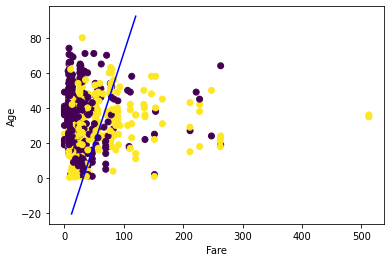

In [ ]:
# Let's see how to plot the line for Logistic Regression

coeff_1 = model.coef_[0,0]
coeff_2 = model.coef_[0,1]
intercept = model.intercept_
var_1 = np.linspace(12, 120, 100)
var_2 = (- coeff_1 * var_1 - intercept)/coeff_2
plt.xlabel('Fare')
plt.ylabel('Age')
plt.plot(var_1, var_2, '-b', label="")
plt.scatter(df['Fare'], df['Age'], c = df['Survived'])

plt.show()

In [ ]:
# Now we make predictions with this model by using all the features. Here we cannot provide any representation as we did before
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values

model.fit(X, y)
print(model.predict([[3, True, 22.0, 1, 0, 7.25]]))
print(f'Predictions for the first 5 people are: {model.predict(X[:5])}')
print(f'Actual value for the first 5 people are: {y[:5]}')

[0]
Predictions for the first 5 people are: [0 1 1 1 0]
Actual value for the first 5 people are: [0 1 1 1 0]


### Score the Model

We are going to see many ways to calculate scores. First idea is to see how much prediction we got correct.

In [ ]:
y_pred = model.predict(X)
print(((y == y_pred).sum())/y.shape[0])

0.8049605411499436


In [ ]:
# More convinient to use a different method which give same result
print(model.score(X, y))

0.8049605411499436


### Logistic Regression with Breast Cancer Datasets

In [ ]:
# Let's see how to perform a Logistic Regression with a more consistent case study. Data are stored in a dictionary
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
print(cancer_data.keys())
print(cancer_data['DESCR'])
print(cancer_data['data'].shape)

df = pd.DataFrame(cancer_data['data'], columns = cancer_data['feature_names'])
print(df.head())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for ea

In [ ]:
# Now let's create variables for fitting the model with
X = df[cancer_data.feature_names].values
df['target'] = cancer_data['target']
y = df['target'].values
model = LogisticRegression(solver='liblinear')    # See that we need to change the solver, otherwise we will get a convergence warning
model.fit(X, y)
for i in range(100):
  print(f'For datapoint {i}: Actual value is {y[i]} / Prediction is {model.predict([X[i]])}')
print(model.score(X, y))

For datapoint 0: Actual value is 0 / Prediction is [0]
For datapoint 1: Actual value is 0 / Prediction is [0]
For datapoint 2: Actual value is 0 / Prediction is [0]
For datapoint 3: Actual value is 0 / Prediction is [1]
For datapoint 4: Actual value is 0 / Prediction is [0]
For datapoint 5: Actual value is 0 / Prediction is [0]
For datapoint 6: Actual value is 0 / Prediction is [0]
For datapoint 7: Actual value is 0 / Prediction is [0]
For datapoint 8: Actual value is 0 / Prediction is [0]
For datapoint 9: Actual value is 0 / Prediction is [0]
For datapoint 10: Actual value is 0 / Prediction is [0]
For datapoint 11: Actual value is 0 / Prediction is [0]
For datapoint 12: Actual value is 0 / Prediction is [0]
For datapoint 13: Actual value is 0 / Prediction is [1]
For datapoint 14: Actual value is 0 / Prediction is [0]
For datapoint 15: Actual value is 0 / Prediction is [0]
For datapoint 16: Actual value is 0 / Prediction is [0]
For datapoint 17: Actual value is 0 / Prediction is [0]
Fo

## Model Evaluation

We will see shortly that there are many ways for evaluating models.

First one we already saw is the **accuracy**
$$
accuracy = \frac{n\_correctly\_predicted}{n\_predictions}
$$

Another important concept we are going to deal with is the **confusion matrix**

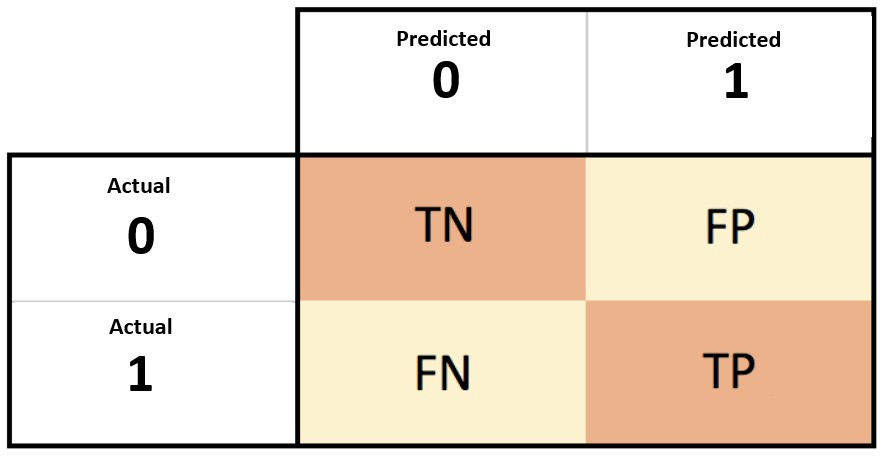

... where 1 is positive and 0 is negative.

First measure is the **precision**, defined as

$$
\text { precision }=\frac{\# \text { positives predicted correctly }}{\# \text { positive predictions }}=\frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FP}}
$$

The precision is defined as the number of positives our model can detect and that are actual positives (TP) divided by the number of all positives our model detect, which are both real positives and negatives (TP + FP)

Another important measure is called **recall**

$$
\text { recall }=\frac{\# \text { positives predicted correctly }}{\# \text { positive cases }}=\frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FN}}
$$

The recall is defined as the number of positives our model can detect and that are actual positives (TP) divided by the total number of real positives, which is formed by the positives we were able to detect (TP) and the ones we missed (FN), so (TP + FN)

When dealing with the accuracy of our model, we have a trade-off between precision and recall. We have to build our model in order to maximize both, but sometimes we need more precision and less recall or viceversa. The focus we need to have is whether is much important if we want to minimize FP or FN.


---



Let's see an example: we have to build a model which detect spam email, so that everytime we flag an email as spam, we immediately delete it. Let's also assume that:



*   Positive cases (1) are spam
*   Negative cases (2) are legitimate

Now we should take a look at what are the entries for our confusion matrix:



*   TP = mails that are spam and we detect as spam
*   TN = mails that are legitimate and we detect as legitimate
*   FP = mails that are legitimate and we detect as spam
*   FN = mails that are spam and we detect as legitimate

Now we can clearly see that it is much more important to build a model which minimize FP rather than FN. That is because if we detect as spam a mail that is legitimate, we could end up deleting some important emails. While in the second case, we don't care a lot about letting go some spam emails. In this case we should minimize FP, which means maximize precision (and so maximize FN, which means minimize recall).









Another measure that take into account both precision and recall is the **F1 score**, defined as:

$$
\mathrm{F} 1=2 \cdot \frac{\text { precision } \cdot \text { recall }}{\text { precision }+\text { recall }}
$$

In [ ]:
# Now let's see how to calculate those metrics with Scikit-Learn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)

print('accuracy', accuracy_score(y, y_pred))
print('precision', precision_score(y, y_pred))
print('recall', recall_score(y, y_pred))
print('f1 score', f1_score(y, y_pred))

accuracy 0.8049605411499436
precision 0.7734627831715211
recall 0.6988304093567251
f1 score 0.7342549923195083


In [ ]:
# We can also generate a confusion matrix in Sklearn
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))

[[475  70]
 [103 239]]


### Overfitting, training and testing
Overfitting is the condition where our model perform well on data we fit the model on but bad on new data.

First we begin to split the dataset into



*   Training Set: for building the model
*   Test Set: for evaluating the model



In [ ]:
# In Sklearn we have a function to perform a split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

print("whole dataset:", X.shape, y.shape)
print("training set:", X_train.shape, y_train.shape)
print("test set:", X_test.shape, y_test.shape)

whole dataset: (887, 6) (887,)
training set: (665, 6) (665,)
test set: (222, 6) (222,)


Look that if we perform every time the split we get a different split and then different performance. If we want to avoid that we can set a seed called **Random State**.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5)

In [ ]:
# Now we are going to fit the model on training set and evaluate it on test set
model = LogisticRegression()
model.fit(X_train, y_train)


# Let's see what is the score
y_pred = model.predict(X_test)
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("f1 score:", f1_score(y_test, y_pred))

accuracy: 0.8333333333333334
precision: 0.835820895522388
recall: 0.6829268292682927
f1 score: 0.7516778523489933


### ROC Curve
When dealing with Logistic Regression we say that the output of the function is a probability. In the example of the Titanic Dataset we say that if 


*   the passenger has a probability of surviving $\geq 0.5$ we say that the passenger survived.

*   the passenger has a probability of surviving $< 0.5$ we say that the passenger didn't survive.

But the value $0.5$ is a threshold we can modify. Each choice of the threshold defines a **ROC Curve** (ROC = Receiver Operating Characteristics)

The ROC Curve is a graph of **sensitivity vs specificity** (actually is sensitivity vs 1 - specificity.

Now we take a look at the definition of sensitivity and specificity.



*   Sensitivity is another word for recall, so defined as

$$
\text { sensitivity }=\text { recall }=\frac{\# \text { positives predicted correctly }}{\# \text { positive cases }}=\frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FN}}
$$

*   Specificity is the true negative rate, so

$$
\text { specificity }=\frac{\# \text { negatives predicted correctly }}{\# \text { negative cases }}=\frac{\mathrm{TN}}{\mathrm{TN}+\mathrm{FP}}
$$

Sklearn has not defined functions for sensitivy and specificity, but we can define them easily.

In [ ]:
# Let's see how we calculate sensitivity and specificity in Sklearn
# Since sensitivity is the same as recall
from sklearn.metrics import recall_score
sensitivity_score = recall_score
print(sensitivity_score(y_test, y_pred))

0.6829268292682927


In [ ]:
# To calculate specificity we need to define a function
from sklearn.metrics import precision_recall_fscore_support
def specificity_score(y_true, y_pred):
  p, r, f, s = precision_recall_fscore_support(y_true, y_pred)
  return r[0]


print(specificity_score(y_test, y_pred))

0.9214285714285714


In [ ]:
# If we want to adjust the threshold we can do things like this
y_pred = model.predict_proba(X_test)[:, 1] > 0.75     # Set the threshold to 0.75

print('precision', precision_score(y_test, y_pred))
print('recall', recall_score(y_test, y_pred))

precision 0.9230769230769231
recall 0.43902439024390244


If we set the threshold to 0.75 it means that we want to be much sure that a prediction is positive if it is actually positive. It means that we are going to reduce FP, and so improving in term of precision (but reducing the recall).
Note that there is a big difference between the predict and the predict_proba method. In fact:



*   predict returns the prediction for a certain datapoint, so 0 or 1.
*   predict_proba returns the probability for that prediction, so a value that can range between 0 and 1.




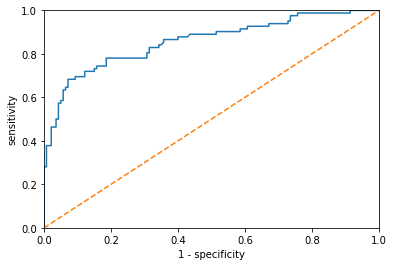

In [ ]:
# Let's build and graph a ROC Curve
from sklearn.metrics import roc_curve

y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.show()

ROC curve are used to compare different models.
Let's see an example of how we can compare them.
We will use the AUC score which represents the area under the curve. The bigger it is, the better the model performs overall.

In [ ]:
# Let's build another model and compare it to the previous one
from sklearn.metrics import roc_auc_score

model2 = LogisticRegression()
model2.fit(X_train[:, 0: 2], y_train)
y_pred_proba2 = model2.predict_proba(X_test[: , 0:2])
print(f'model 1 AUC score: {roc_auc_score(y_test, y_pred_proba[:, 1])}')
print(f'model 2 AUC score: {roc_auc_score(y_test, y_pred_proba2[:, 1])}')

model 1 AUC score: 0.8572299651567944
model 2 AUC score: 0.8390679442508711


### K-fold Cross Validation
Every time we build a different model by splitting datasets into train and test set, we get a different metrics.
Let's say we want to build a model with 20% of data for Test Set and 80% for Training. Suppose we have 100 datapoints. We could create 5 chunks of data as follows.

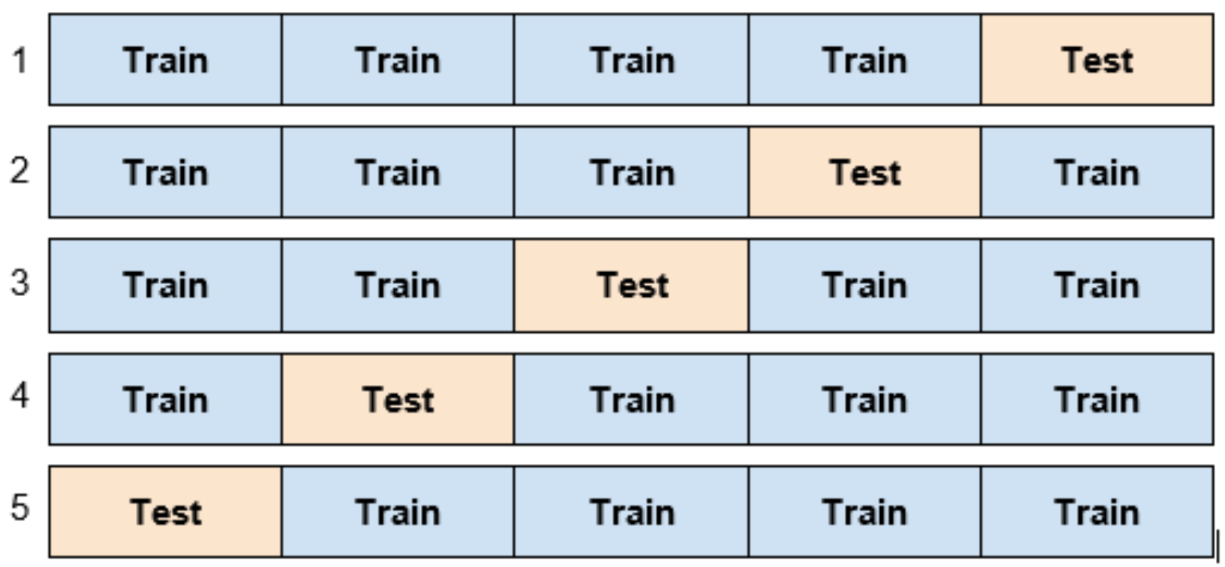

So we have 5 different ways of splitting the data.

So if we get 5 different values for the accuracy, the overall accuracy of the model will be the average of all the values for the single split.
This process is called **k-fold Cross Validation**. k means how many chunks we create, in this case $k=5$. By the way this is a way to get a reliable value for the accuracy of the model, but our final model will be built on all data.
If one asks as what is the accuracy of the model, we answer with the mean we have calculated before. In other words, k-fold Cross Validation is a way to obtain the accuracy of a model that we are not testing on anything.

In [ ]:
# Now let's see how to perform k-fold Cross Validation with Scikit-Learn
from sklearn.model_selection import KFold

X = df[['Age', 'Fare']].values[:6]
y = df[['Survived']].values[:6]
kf = KFold(n_splits=3, shuffle=True)      # n_splits = 3 means it is a 3-fold Cross Validation. Shuffle is whether or not randomize the order of data
for train, test in kf.split(X):
  print(train, test)      # Indices of the split

[0 1 3 4] [2 5]
[1 2 4 5] [0 3]
[0 2 3 5] [1 4]


In [ ]:
# Now let's manipulate all the splits and do something with them
splits = list(kf.split(X))      # Note that split method actually performs the splitting, so if you run this cell many times you get a different result each time      
first_split = splits[0]
print(first_split)

train_indices, test_indices = first_split
print(f'Training indices: {train_indices}')
print(f'Test indices: {test_indices}')

(array([0, 3, 4, 5]), array([1, 2]))
Training indices: [0 3 4 5]
Test indices: [1 2]


In [ ]:
# Now we can easily use indexes for creating train and test set
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[22.      7.25  ]
 [35.     53.1   ]
 [35.      8.05  ]
 [27.      8.4583]]
[[0]
 [1]
 [0]
 [0]]
[[38.     71.2833]
 [26.      7.925 ]]
[[1]
 [1]]


Now this is the basic of k-fold Cross Validation. Let's see how we can build the model using k-fold Cross Validation,

In [ ]:
# Again, if you run this code you get a different score value each time. This is because we are performing each split once.
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

kf = KFold(n_splits=5, shuffle=True)

splits = list(kf.split(X))
train_indices, test_indices = splits[0]
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.7808988764044944


In [ ]:
# Now let's see how to build the final model
scores = []
kf = KFold(n_splits=5, shuffle=True)

for train_index, test_index in kf.split(X):
  X_train = X[train_index]
  y_train = y[train_index]
  X_test = X[test_index]
  y_test = y[test_index]
  model = LogisticRegression(solver='liblinear')
  model.fit(X_train, y_train)
  scores.append(model.score(X_test, y_test))

print(scores)
print(np.mean(scores))

# Now the model is ready so we can fit on all data
final_model = LogisticRegression()
final_model.fit(X, y)

[0.7528089887640449, 0.8426966292134831, 0.7740112994350282, 0.8418079096045198, 0.751412429378531]
0.7925474512791214


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Note that there is a built-in function in sklearn that performs k-fold Cross Validation. What it does is
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print(scores)
print(np.mean(scores))

[0.79213483 0.79213483 0.7740113  0.7740113  0.81920904]
0.7903002602678855
0.7903002602678855


k-fold Cross Validation is a very powerful way of comparing many models. In fact, one can decide to fit the model on all the features, one can choose some statistically significant features and then we can compare those models. Once we have done that we can decide which will be our final model to build.

## Decision Tree
In this chapter we are going to build a **Decision Tree** model, which is very powerful.
First thing we have to say is that as opposed to logistic regression, Decision Trees models are **non-parametric**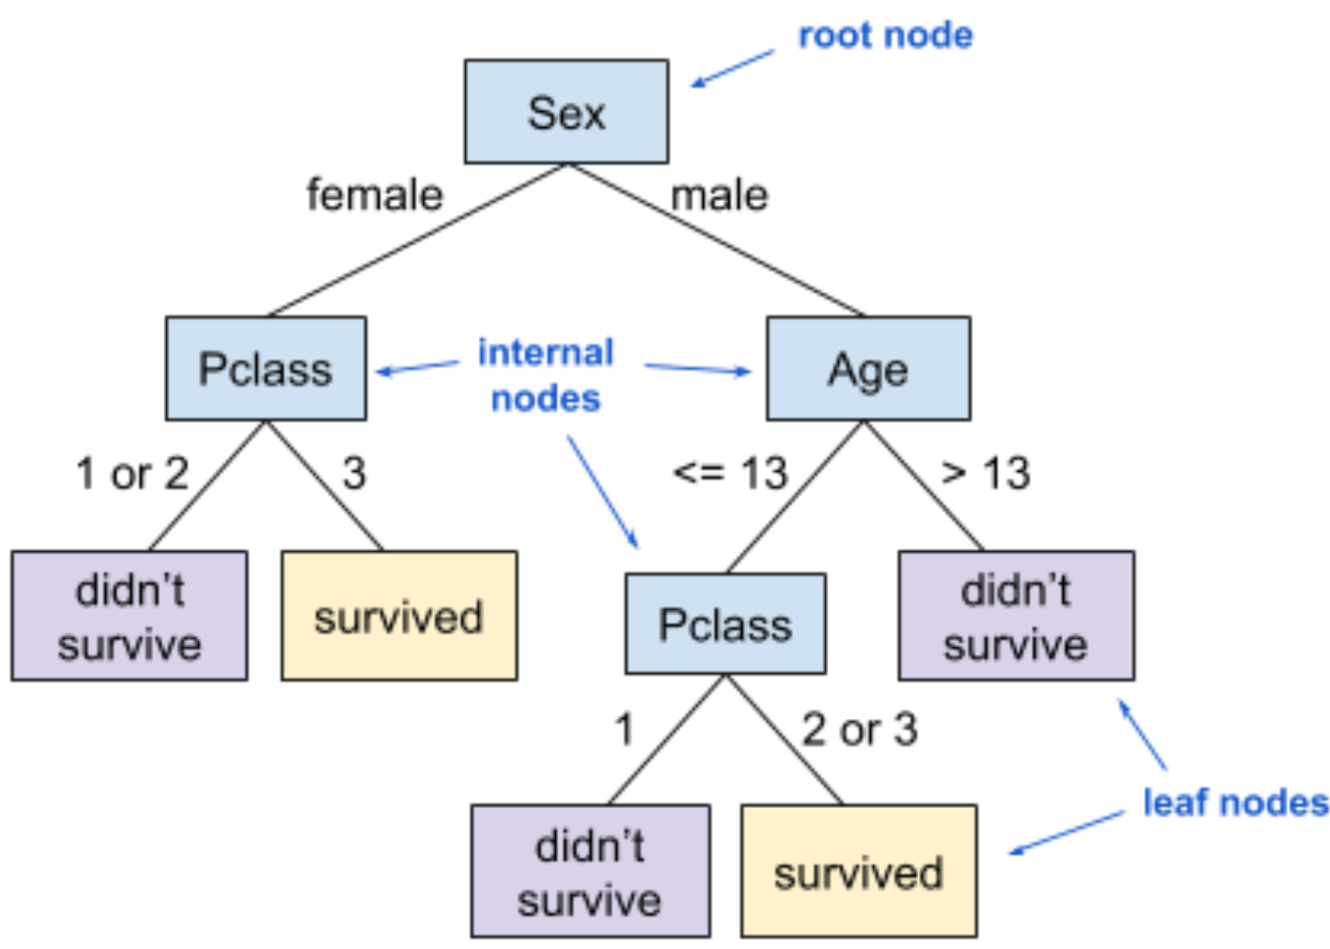

Let's begin with some terminology.



*   Each rectangle is called **node**.
*   Nodes which have a feature to split on are called **internal nodes**.
*   The first internal node is called **root** node.
*   The final nodes where we end up giving the prediction survived/not survived are called **leaf** nodes.
*   The nodes under other nodes are called **children**.

You can think of a decision tree as a tree upside down, where the root is on the top and the leafs are down.


We will see that one of the greates advantages of Decision Tree is the **interpretability**. You just have to make yourself questions and follow the paths to determine if our prediction for a certain datapoints is that he has or not survived.

Let's pretend we want to make prediction on a certain datapoint which is a Male passenger who is 12 years old and stayed in Pclass 3. Following our path we can predict he has survived.

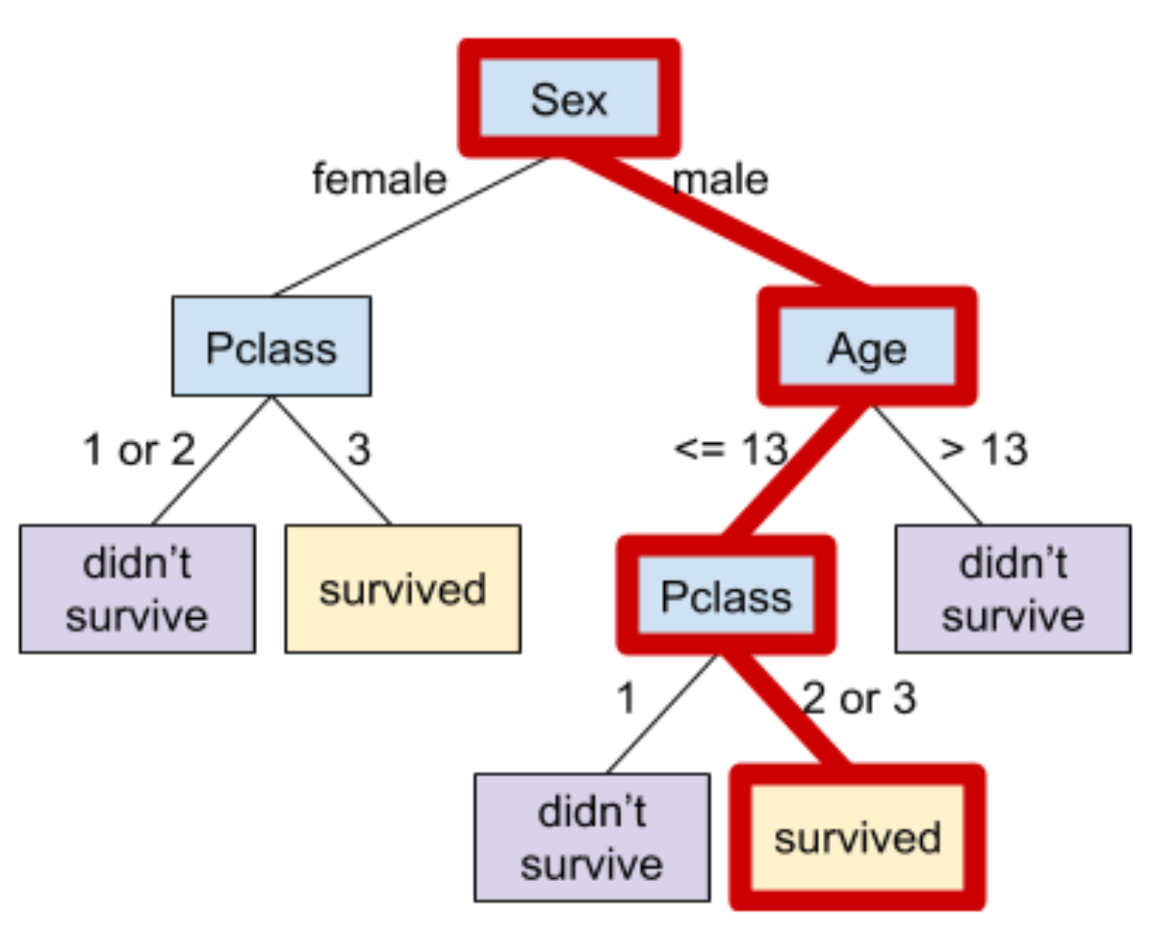

For the purpose of building a decision tree, we don't choose features to split on randomly. We begin with the ones we assume have the biggest **predictive power**. Sometimes a Data Scientist is helped by a domain expert to get a sort of predictive ranking among features.

As we said, what makes a good split is whether a features is predictive or not. Let's make two quick examples to understand:

 

1.   Suppose we have a strange situation on the Titanic which leads to all the men dying and all the women surviving. It means that the best possible feature to split on will be the Sex. It won't make any sense for us to split on Fare, Age or else before Sex.
2.   Now suppose the opposite situation. Let us assume we have 100 datapoints and we split on Sex. After splitting on Sex, we see that 50 men and 50 women survived and the rest of them died. That mean we haven't gained any information from splitting on Sex, so we might as well choose a different feature to split on.

Let's describe the two situations via two images:

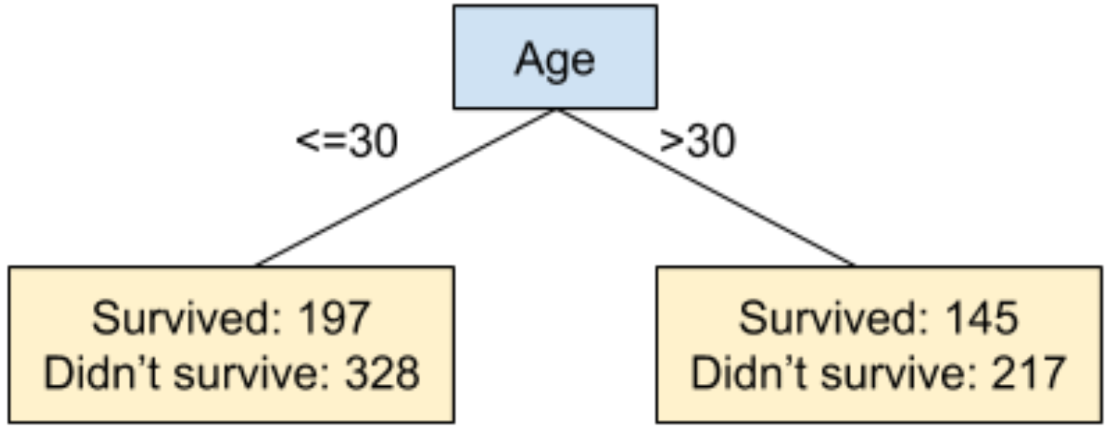

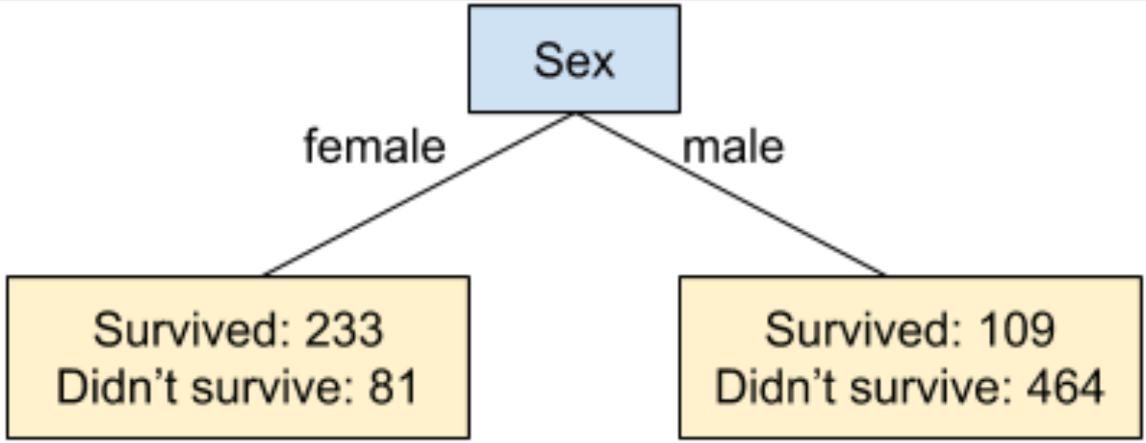

Look at the two different images. In the first image we decide to split on Age, we see that the percentage of people surviving is about $40%$ at each side. This means we haven't got much information from the splitting.

In the second image we split on Sex and as we can easily see for example on the male side the vast majority didn't survive. That is informative.

The mathematical term for describing how much a feature is predictive is the so-called **information gain**. There are many ways to estimate it, but we can begin by define one.

First one is called **Gini impurity**.
To calculate the Gini impurity we first begin to:



1.   Split the data on a feature
2.   Calculate for each side the percentage of passengers that survived and the percentage that didn't survive
3.   Compute the Gini impurity as follows $$
\operatorname{gini}=2 \times p \times(1-p)
$$
Where $p$ is the probability of surviving.

The Gini impurity is a function that goes as follows:
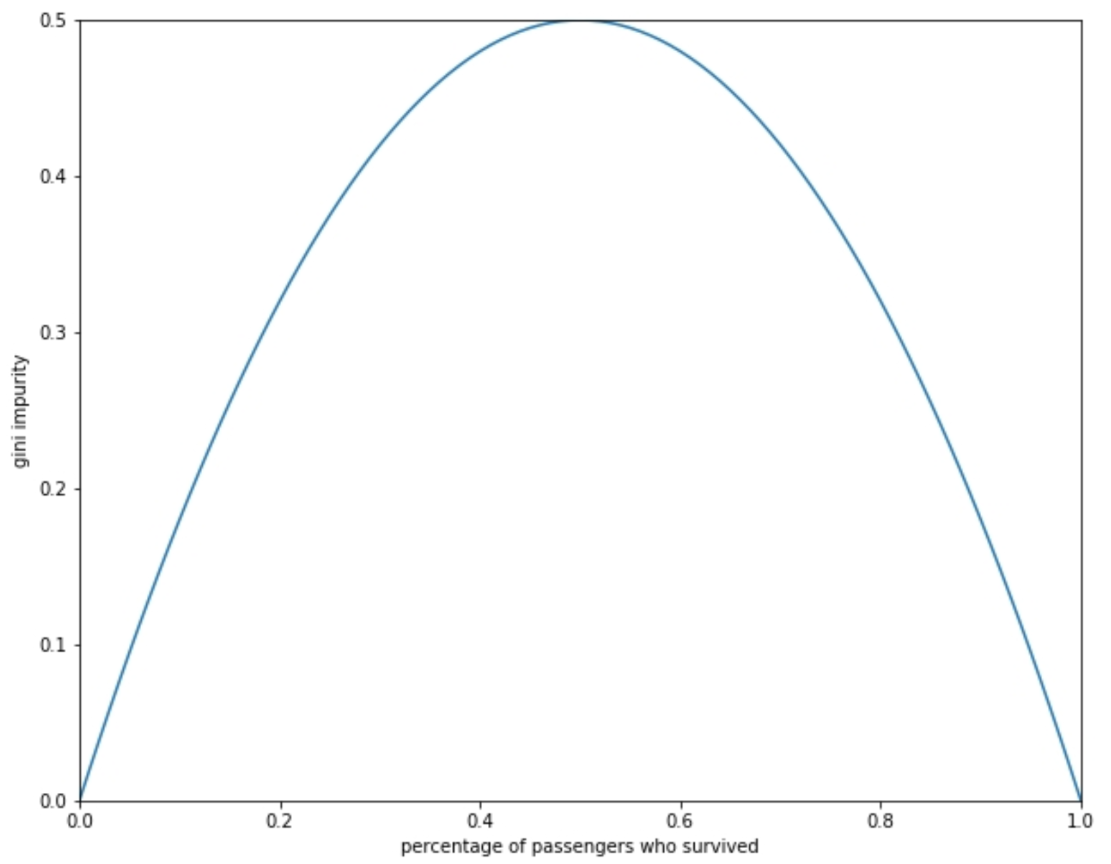

So its maximum values is $0.5$ that it takes when $p = 0.5$. This is the condition of maximum impurity of data. The model is so much better as the value of the Gini impurity is distant from $0.5$.


Second measure is called **Entropy**. It ranges between 0 and 1, where

*   $0$ means all passengers survived (didn't survive)
*   $1$ is the condition of maximum impurity (50 and 50%)

The formula for calculating entropy is:

$$
\text { entropy }=-\left[p \log _{2} p+(1-p) \log _{2}(1-p)\right. \text { . }
$$

